# Le-Net 1 based architecture

We start with 41X41 (I) after first convolution (9x9)we have 33X33 (L1). The next pooling layer reduces dimension with 3 to an output image of 11X11 with 4x4 pooling kernels (L2). Then we apply different types of convolution 4x4 kernels on the L2 layer resulting in 8x8 (L3) . Then followed by pooling 2X2 resulting in 4x4 output map (L4). So we have 16 connection for each element in layer L4 (which depend on the amount of different Covolutions in L3) 


\begin{equation}
f(x)=\frac{1}{1+e^{-x}} \\
F_{k}= f( \sum_{i} \mathbf{W^{k}_{i} \cdot y_{i}}-b_{k})
\end{equation}


\begin{equation}
E=\sum_{k} \frac{1}{2}|t_k-F_{k}|^{2} \\
\Delta W_{ij}= - \eta \frac{dE}{d W_{ij}}
\end{equation}

\begin{equation}
\Delta W_{ij}= \sum_{k} - \eta \frac{dE}{d F_{k}} \frac{dF_{k}}{dx_{k}} \frac{dx_{k}}{dW_{ij}}=\sum_{k} \eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} \frac{dx_{k}}{dW_{ij}} \\
= \eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} y_{ij}
\end{equation}

\begin{equation}
\Delta b_{k}= - \eta \frac{dE}{d F_{k}} \frac{dF_{k}}{dx_{k}} \frac{dx_{k}}{b_{k}}=\eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} \cdot-1
\end{equation}

Since $\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}}$ is always positive we can neglect this term in our programme

\begin{equation}
x_{k}=\sum_{ij} W^{k}[i,j] \; y^{4rb}[i,j] - b_{k}
\end{equation}

\begin{equation}
y^{4rb}[i,j]= \sum_{u,v} W^{3rb}[u,v] \; y^{3rb} [2i+u,2j+v]
\end{equation}

\begin{equation}
y^{3rb} [2i+u,2j+v]= \sum_{nm} W^{2rb}[n,m] \; y^{2rb}[n+(2i+u),m+(2j+v)] 
\end{equation}

\begin{equation}
\begin{split}
\Delta W^{2rb}[n,m] =\sum_{k} - \eta  \frac{dE}{dF_{k}} 
\frac{dF_{k}}{dx_{k}} 
\sum_{ij} \frac{dx_{k}}{dy^{4rb}[i,j]} 
 \sum_{uv}\frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} 
\frac{d y^{3rb} [2i+u,2j+v]}{d W^{2rb}[n,m]}
\end{split}
\end{equation}

\begin{equation}
    \begin{split}
    & \frac{dx_{k}}{dy^{4rb}[i,j]} = W^{k}[i,j]\\
    & \frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} = W^{3rb}[u,v] \\
    & \frac{d y^{3rb} [2i+u,2j+v]}{d W^{2rb}[n,m]}= y^{2rb} [n+(2i+u),m+(2j+v)] \\
    \end{split}
\end{equation}

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as lin
import scipy.signal as sig
from PIL import Image
import glob

patchSize=48 # patchsize this must be 48 since our network can only handle this value
RGB=0 # determines the R,G or B value used
# Open forest
Amount_data= len(glob.glob('Forest/F*'))
for k in range (0, Amount_data):
    name="Forest/F%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    globals()['dataPatchedF%s' % (k+1)]=np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,RGB] for i in range(0,Xamount)] for j in range(0,Yamount)])

# Open city
Amount_data= len(glob.glob('City/C*'))
for k in range (0, Amount_data):
    name="City/C%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    globals()['dataPatchedC%s' % (k+1)]=np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,RGB] for i in range(0,Xamount)] for j in range(0,Yamount)])

# Open water
Amount_data= len(glob.glob('Water/W*'))
for k in range (0, Amount_data):
    name="Water/W%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    globals()['dataPatchedW%s' % (k+1)]=np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,RGB] for i in range(0,Xamount)] for j in range(0,Yamount)])


   

In [88]:
dataPatchedC9.shape

(13L, 32L, 41L, 41L)

C:\Users\Michiel Bongaerts\Anaconda\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


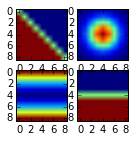

In [5]:
plots=[WC11,WC12,WC13,WC14]#WC15,WC16,WC17,WC18,WC19,WC110,WC111]
plt.figure(figsize=(2,2))
for i in range(0,len(plots)):
    plt.subplot(2,len(plots)/2,i)
    plt.imshow(plots[i])

    

In [101]:
########### Functions ############################################################################################################################

def Sigmoid(x): # a is used to adjust the slope of the function 
    return (1/(1+np.exp(-x)))

def Pool(I,W):
    PoolImg=np.zeros((len(I)/len(W),len(I)/len(W))) # W must fit an integer times into I.
    for i in range(0,len(PoolImg)):
        for j in range(0,len(PoolImg)):
            SelAr=I[i*len(W):(i+1)*len(W),j*len(W):(j+1)*len(W)]
            PoolImg[i,j]=np.inner(SelAr.flatten(),W.flatten()) # Now this is just an inner product since we have vectors
    return PoolImg

def makeGaussian(size, fwhm = 3, center=None):
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

############## Update rule for convolution weights ##################################
def updateW2(W2rb, n, m):
    update=0
    n3=1
    for k in range(0,3): #sum over k
        for i in range(0,4): # sum over j so the elementen in the last-weights
            for j in range(0,4): # sum over j so the elementen in the last-weights
                for u in range(0,2): # sum over u which are represent the elements of the pooling L3
                        for v in range(0,2): # sum over j so the elementen in the last-weights
                            update=update+n3*(t[k]-f[k])*W_k[k,i,j]*y2rb[n+(2*j+u),m+(2*j+v)]
    return update


############ FILTERS #####################################################################################################################################
WC1=np.zeros((9,9))
WC1[4:5,:]=1
WC1[5:9,:]=2
WC2=np.zeros((9,9))
for i in range(0,len(WC2)):
    for j in range(0,len(WC2)):
        if(i==j):WC2[i,j]=1
        if(i>j): WC2[i,j]=2
            
WC3=makeGaussian(9,4)
WC4=np.zeros((9,9))
x=np.linspace(0,15*np.pi,9)
for i in range(0,9):
    WC4[:,i]=np.sin(x)
WC5=np.transpose(WC11)            
WC6=np.fliplr(WC15)
WC7=np.ones((9,9))
WC8=dataPatchedF7[5,5,0:9,0:9] #take a patch from forest as filter!
WC9=np.zeros((9,9))
x=np.linspace(0,0.01*np.pi,9)
for i in range(0,9):
    WC9[i,:]=np.sin(x)
WC10=np.transpose(WC9)
WC11=WC1+WC2/2

W1rb=np.array([ 
    [1,1,1],
    [1,1,1],
    [1,1,1],
    ])

W2rb=np.random.rand(1,4,4) 
W3rb=np.array([
    [1,1],
    [1,1]
    ])

################### Initialize random weights ##############################################################################################
W_k=np.random.rand(3,4,4) 
y3rb=np.array([np.zeros((8,8)) for i in range(0,3)])
y4rb=np.array([np.zeros((4,4)) for i in range(0,3)])

bias=np.zeros((3,1))
################### Data settings for training #############################################################################################
data_list=([[dataPatchedF1,dataPatchedF2,dataPatchedF3,dataPatchedF4,dataPatchedF5,dataPatchedF6,dataPatchedF7,dataPatchedF8,dataPatchedF9],
           [dataPatchedC1,dataPatchedC2,dataPatchedC3,dataPatchedC4,dataPatchedC5,dataPatchedC6,dataPatchedC7,dataPatchedC8,dataPatchedC9],
           [dataPatchedG1,dataPatchedG2,dataPatchedG3,dataPatchedG4,dataPatchedG5,dataPatchedG6,dataPatchedG7,dataPatchedG8,dataPatchedG9]
            ])

class_list=np.array([
            [1,0,0], #forest
            [0,1,0], #City
            [0,0,1]  #Grass/Water
            ])


#################### Start Training ################################################################################################
py=0
px=0
d1=0
d2=0
for uu in range(0,100):
    if(d1==3): # amount of dataset classes (3: forest,city,water)
        d1=0 
        d2=d2+1 
    if(d2==9): #amount of datasets per class
        d2=0
        if(px==32 and py==12): # 32 and 12 are the amount of patches in dataPatched
            print('stop')
            break # If searchspace is achieved the loop will stop
        if(py==12): 
            j=j+1 # selects new patch in x direction
            py=0
        py=py+1  # i must increase to cover all patches over y-direction

    inputPatch=data_list[d1][d2][py,px,:,:]  
    t=class_list[d1]
    d1=d1+1
#     if(t2==1):continue
    #L1
    y1rb=sig.convolve(inputPatch,WC1,mode='valid')
    #L2
    y2rb=Pool(y1,W1rb) # reducing dimensionality by 2.
    for b in range(0,1): # here b is the amount of branches for each row 
        y3rb[b]=sig.convolve(y2,W2rb[b,:,:],mode='valid')  #L3
        y4rb[b]=Pool(y3[b],W3rb) #L4
        
    n1=2*10**-4
    n2=1*10**-2
    
    # Now we have the outputs
    x1=(
        np.inner(y4rb[0].flatten(),W_k[0].flatten())
        )
    
    x2=(
        np.inner(y4rb[0].flatten(),W_k[1].flatten())
        )
    x3=(
        np.inner(y4rb[0].flatten(),W_k[2].flatten())
        )
    f=[Sigmoid(x1-b1),Sigmoid(x2-b2),Sigmoid(x3-b3)]
    
    for n in range(0,3):
        for m in range(0,3):
            W2rb[0,n,m]=W2rb[0,n,m]+updateW2(W2rb[0],n,m)
    
    for k in range(0,3):
        bias[k]=bias[k] -n1*(t[k]-f[k])
    
    for k in range(0,3):
        W_k[k]=W_k[k] +n1*(t[k]-f[k])*y4rb[0]
    
        

    
    

In [100]:
data_list[0][9].shape

IndexError: list index out of range

In [29]:
y2rb.shape

(11L, 11L)

In [30]:
W2rb.shape

(1L, 4L, 4L)